<!--- Licensed to the Apache Software Foundation (ASF) under one -->
<!--- or more contributor license agreements.  See the NOTICE file -->
<!--- distributed with this work for additional information -->
<!--- regarding copyright ownership.  The ASF licenses this file -->
<!--- to you under the Apache License, Version 2.0 (the -->
<!--- "License"); you may not use this file except in compliance -->
<!--- with the License.  You may obtain a copy of the License at -->

<!---   http://www.apache.org/licenses/LICENSE-2.0 -->

<!--- Unless required by applicable law or agreed to in writing, -->
<!--- software distributed under the License is distributed on an -->
<!--- "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY -->
<!--- KIND, either express or implied.  See the License for the -->
<!--- specific language governing permissions and limitations -->
<!--- under the License. -->

# Loss functions

Loss functions are used to train neural networks and to compute the difference between output and target variable. A critical component of training neural networks is the loss function. A loss function is a quantative measure of how bad the predictions of the network are when compared to ground truth labels. Given this score, a network can improve by iteratively updating its weights to minimise this loss. Some tasks use a combination of multiple loss functions, but often you'll just use one. MXNet Gluon provides a number of the most commonly used loss functions, and you'll choose certain loss functions depending on your network and task. Some common task and loss function pairs include:

- Regression: [L1Loss](../../../../api/gluon/loss/index.rst#mxnet.gluon.loss.L1Loss), [L2Loss](../../../../api/gluon/loss/index.rst#mxnet.gluon.loss.L2Loss)
- Classification: [SigmoidBinaryCrossEntropyLoss](../../../../api/gluon/loss/index.rst#mxnet.gluon.loss.SigmoidBinaryCrossEntropyLoss), [SoftmaxCrossEntropyLoss](../../../../api/gluon/loss/index.rst#mxnet.gluon.loss.SoftmaxCrossEntropyLoss)
- Embeddings: [HingeLoss](../../../../api/gluon/loss/index.rst#mxnet.gluon.loss.HingeLoss)

We'll first import the modules, where the `mxnet.gluon.loss` module is imported as `gloss` to avoid the commonly used name `loss`.

In [1]:
from IPython import display
from matplotlib import pyplot as plt
import mxnet as mx
from mxnet import np, npx, autograd
from mxnet.gluon import nn, loss as gloss

## Basic Usages

Now let's create an instance of the $\ell_2$ loss, which is commonly used in regression tasks.

In [2]:
loss = gloss.L2Loss()

And then feed two inputs to compute the elementwise loss values.

In [3]:
x = np.ones((2,))
y = np.ones((2,)) * 2
loss(x, y)

[02:14:53] /work/mxnet/src/storage/storage.cc:202: Using Pooled (Naive) StorageManager for CPU


array([0.5, 0.5])

These values should be equal to the math definition: $0.5\|x-y\|^2$.

In [4]:
.5 * (x - y)**2

array([0.5, 0.5])

Next we show how to use a loss function to compute gradients.

In [5]:
X = np.random.uniform(size=(2, 4))
net = nn.Dense(1)
net.initialize()
with autograd.record():
    l =  loss(net(X), y)
print(l)

[1.9693424 1.8299799]


We can compute the gradients w.r.t. the loss function.

In [6]:
l.backward()
print(net.weight.grad())

[[-1.8419125 -2.70033   -3.135582  -2.3254309]]


## Loss functions

Most commonly used loss functions can be divided into 2 categories: regression and classification.

Let's first visualize several regression losses. We visualize the loss values versus the predicted values with label values fixed to be 0.

In [7]:
def plot(x, y):
    display.set_matplotlib_formats('svg')
    plt.plot(x.asnumpy(), y.asnumpy())
    plt.xlabel('x')
    plt.ylabel('loss')
    plt.show()

def show_regression_loss(loss):
    x = np.arange(-5, 5, .1)
    y = loss(x, np.zeros_like(x))
    plot(x, y)


Then plot the classification losses with label values fixed to be 1.

In [8]:
def show_classification_loss(loss):
    x = np.arange(-5, 5, .1)
    y = loss(x, np.ones_like(x))
    plot(x, y)

#### [L1 Loss](../../../../api/gluon/loss/index.rst#mxnet.gluon.loss.L1Loss)

L1 Loss, also called Mean Absolute Error, computes the sum of absolute distance between target values and the output of the neural network. It is defined as:

$$ L = \sum_i \vert {label}_i - {pred}_i \vert. $$

It is a non-smooth function that can lead to non-convergence. It creates the same gradient for small and large loss values, which can be problematic for the learning process.

/tmp/ipykernel_191615/841998161.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


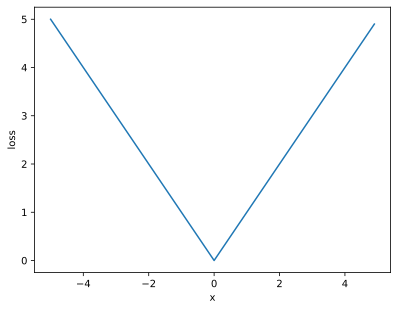

In [9]:
show_regression_loss(gloss.L1Loss())

#### [L2 Loss](../../../../api/gluon/loss/index.rst#mxnet.gluon.loss.L2Loss)

L2Loss, also called Mean Squared Error, is a regression loss function that computes the squared distances between the target values and the output of the neural network. It is defined as:

$$ L = \frac{1}{2} \sum_i \vert {label}_i - {pred}_i \vert^2. $$

Compared to L1, L2 loss it is a smooth function and it creates larger gradients for large loss values. However due to the squaring it puts high weight on outliers.

/tmp/ipykernel_191615/841998161.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


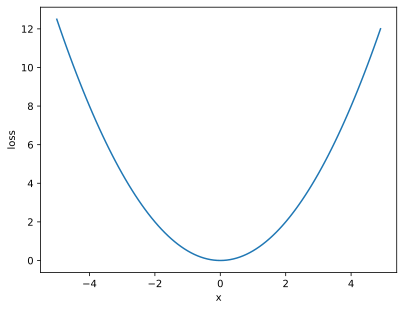

In [10]:
show_regression_loss(gloss.L2Loss())

#### [Huber Loss](../../../../api/gluon/loss/index.rst#mxnet.gluon.loss.HuberLoss)

HuberLoss  combines advantages of L1 and L2 loss. It calculates a smoothed L1 loss that is equal to L1 if the absolute error exceeds a threshold $$\rho$$, otherwise it is equal to L2. It is defined as:
$$
\begin{split}L = \sum_i \begin{cases} \frac{1}{2 {rho}} ({label}_i - {pred}_i)^2 &
                   \text{ if } |{label}_i - {pred}_i| < {rho} \\
                   |{label}_i - {pred}_i| - \frac{{rho}}{2} &
                   \text{ otherwise }
    \end{cases}\end{split}
$$

/tmp/ipykernel_191615/841998161.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


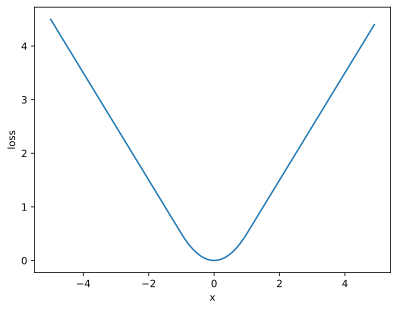

In [11]:
show_regression_loss(gloss.HuberLoss(rho=1))

An example of where Huber Loss is used can be found in [Deep Q Network](https://openai.com/blog/openai-baselines-dqn/).

#### [Cross Entropy Loss with Sigmoid](../../../../api/gluon/loss/index.rst#mxnet.gluon.loss.SigmoidBinaryCrossEntropyLoss)

Binary Cross Entropy is a loss function used for binary classification problems e.g. classifying images into 2 classes. Cross entropy measures the difference between two probability distributions and it is defined as:
$$\sum_i -{(y\log(p) + (1 - y)\log(1 - p))} $$
Before the loss is computed a sigmoid activation is applied per default. If your network has `sigmoid` activation as last layer, then you need set ```from_sigmoid``` to False, to avoid applying the sigmoid function twice.

/tmp/ipykernel_191615/841998161.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


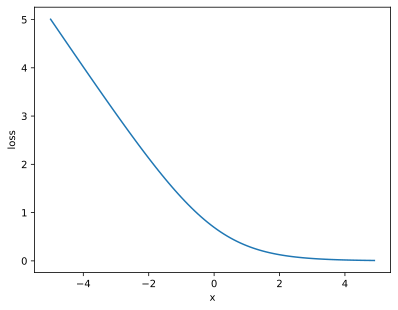

In [12]:
show_classification_loss(gloss.SigmoidBinaryCrossEntropyLoss())

#### [Cross Entropy Loss with Softmax](../../../../api/gluon/loss/index.rst#mxnet.gluon.loss.SoftmaxCrossEntropyLoss)

In classification, we often apply the
softmax operator to the predicted outputs to obtain prediction probabilities,
and then apply the cross entropy loss against the true labels:

$$ \begin{align}\begin{aligned}p = \text{softmax}({pred})\\L = -\sum_i \sum_j {label}_j \log p_{ij}\end{aligned}\end{align}
$$

Running these two steps one-by-one, however, may lead to numerical instabilities. The `loss` module provides a single operators with softmax and cross entropy fused to avoid such problem.

In [13]:
loss = gloss.SoftmaxCrossEntropyLoss()
x = np.array([[1, 10], [8, 2]])
y = np.array([0, 1])
loss(x, y)

array([9.000123 , 6.0024757])

#### [Hinge Loss](../../../../api/gluon/loss/index.rst#mxnet.gluon.loss.HingeLoss)

Commonly used in Support Vector Machines (SVMs), Hinge Loss is used to additionally penalize predictions that are correct but fall within a margin between classes (the region around a decision boundary). Unlike `SoftmaxCrossEntropyLoss`, it's rarely used for neural network training. It is defined as:

$$
L = \sum_i max(0, {margin} - {pred}_i \cdot {label}_i)
$$

/tmp/ipykernel_191615/841998161.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


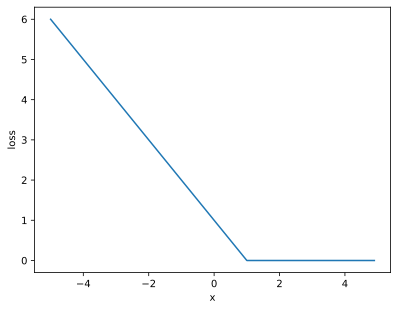

In [14]:
show_classification_loss(gloss.HingeLoss())

#### [Logistic Loss](../../../../api/gluon/loss/index.rst#mxnet.gluon.loss.LogisticLoss)

The Logistic Loss function computes the performance of binary classification models.
$$
L = \sum_i \log(1 + \exp(- {pred}_i \cdot {label}_i))
$$
The log loss decreases the closer the prediction is to the actual label. It is sensitive to outliers, because incorrectly classified points are penalized more.

/tmp/ipykernel_191615/841998161.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


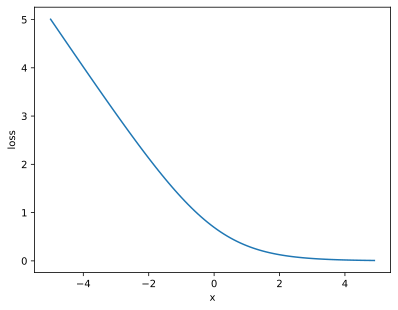

In [15]:
show_classification_loss(gloss.LogisticLoss())

#### [Kullback-Leibler Divergence Loss](../../../../api/gluon/loss/index.rst#mxnet.gluon.loss.KLDivLoss)

The Kullback-Leibler divergence loss measures the divergence between two probability distributions by calculating the difference between cross entropy and entropy. It takes as input the probability of predicted label and the probability of true label.

$$
L = \sum_i {label}_i * \big[\log({label}_i) - {pred}_i\big]
$$

The loss is large, if the predicted probability distribution is far from the ground truth probability distribution. KL divergence is an asymmetric measure. KL divergence loss can be used in Variational Autoencoders (VAEs), and reinforcement learning policy networks such as Trust Region Policy Optimization (TRPO)


For instance, in the following example we get a KL divergence of 0.02. We set ```from_logits=False```, so the loss functions will apply ```log_softmax``` on the network output, before computing the KL divergence.

In [16]:
output = mx.np.array([[0.39056206, 1.3068528, 0.39056206, -0.30258512]])
print('output.softmax(): {}'.format(npx.softmax(output).asnumpy().tolist()))
target_dist = mx.np.array([[0.3, 0.4, 0.1, 0.2]])
loss_fn = gloss.KLDivLoss(from_logits=False)
loss = loss_fn(output, target_dist)
print('loss (kl divergence): {}'.format(loss.asnumpy().tolist()))

output.softmax(): [[0.19999998807907104, 0.5, 0.19999998807907104, 0.09999999403953552]]
loss (kl divergence): [0.025424206629395485]


#### [Triplet Loss](../../../../api/gluon/loss/index.rst#mxnet.gluon.loss.TripletLoss)

Triplet loss takes three input arrays and measures the relative similarity. It takes a positive and negative input and the anchor.

$$
L = \sum_i \max(\Vert {pos_i}_i - {pred} \Vert_2^2 -
    \Vert {neg_i}_i - {pred} \Vert_2^2 + {margin}, 0)
$$

The loss function minimizes the distance between similar inputs and maximizes the distance  between dissimilar ones.
In the case of learning embeddings for images of characters, the network may get as input the following 3 images:

![triplet_loss](/_static/triplet_loss.png)

The network would learn to minimize the distance between the two `A`'s and maximize the distance between `A` and `Z`.

#### [CTC Loss](../../../../api/gluon/loss/index.rst#mxnet.gluon.loss.CTCLoss)

CTC Loss is the [connectionist temporal classification loss](https://distill.pub/2017/ctc/) . It is used to train recurrent neural networks with variable time dimension. It learns the alignment and labelling of input sequences. It takes a sequence as input and gives probabilities for each timestep. For instance, in the following image the word is not well aligned with the 5 timesteps because of the different sizes of characters. CTC Loss finds for each timestep the highest probability e.g. `t1` presents with high probability a `C`. It combines the highest probapilities and returns the best path decoding.

![ctc_loss](/_static/ctc_loss.png)

#### [Cosine Embedding Loss](../../../../api/gluon/loss/index.rst#mxnet.gluon.loss.CosineEmbeddingLoss)
The cosine embedding loss computes the cosine distance between two input vectors.

$$
\begin{split}L = \sum_i \begin{cases} 1 - {cos\_sim({input1}_i, {input2}_i)} & \text{ if } {label}_i = 1\\
                 {cos\_sim({input1}_i, {input2}_i)} & \text{ if } {label}_i = -1 \end{cases}\\
cos\_sim(input1, input2) = \frac{{input1}_i.{input2}_i}{||{input1}_i||.||{input2}_i||}\end{split}
$$

Cosine distance measures the similarity between two arrays given a label and is typically used for learning nonlinear embeddings.
For instance, in the following code example we measure the similarity between the input vectors `x` and `y`. Since they are the same the label equals `1`. The loss function returns $$ \sum_i 1 - {cos\_sim({input1}_i, {input2}_i)} $$ which is equal `0`.

In [17]:
x = mx.np.array([1,0,1,0,1,0])
y = mx.np.array([1,0,1,0,1,0])
label = mx.np.array([1])
loss = gloss.CosineEmbeddingLoss()
print(loss(x,y,label))

[0.]


Now let's make `y` the opposite of `x`, so we set the label `-1` and the function will return  $$ \sum_i cos\_sim(input1, input2) $$

In [18]:
x = mx.np.array([1,0,1,0,1,0])
y = mx.np.array([0,1,0,1,0,1])
label = mx.np.array([-1])
loss = gloss.CosineEmbeddingLoss()
print(loss(x,y,label))

[0.]


#### [PoissonNLLLoss](../../../../api/gluon/loss/index.rst#mxnet.gluon.loss.PoissonNLLLoss)
Poisson distribution is widely used for modelling count data. It is defined as:

$$
f(x) = \frac{\mu ^ {\kern 0.08 em x} e ^ {-\mu}} {x!} \qquad \qquad x = 0,1,2 , \ldots \,.
$$


For instance, the count of cars in road traffic approximately follows a Poisson distribution. Using an ordinary least squares model for Poisson distributed data would not work well because of two reasons:
 - count data cannot be negative
 - variance may not be constant

Instead we can use a Poisson regression model, also known as log-linear model. Thereby the Poisson incident rate $$\mu$$ is
modelled by a linear combination of unknown parameters.
We can then use the PoissonNLLLoss which calculates the negative log likelihood for a target that follows a Poisson distribution.

$$ L = \text{pred} - \text{target} * \log(\text{pred}) +\log(\text{target!}) $$

## Advanced: Weighted Loss

Some examples in a batch may be more important than others. We can apply weights to individual examples during the forward pass of the loss function using the `sample_weight` argument. All examples are weighted equally by default.

In [19]:
x = np.ones((2,))
y = np.ones((2,)) * 2
loss = gloss.L2Loss()
loss(x, y, np.array([1, 2]))

array([0.5, 1. ])

## Conclusion

In this tutorial we saw an example of how to evaluate model performance using loss functions (during the forward pass). Crucially, we then saw how calculate parameter gradients (using `backward`) which would minimise this loss. You should now have a better understanding of when to apply different loss functions, especially for regression vs classification tasks.

## Recommended Next Steps

In addition to loss functions, which are used for explicit optimization, you might want to look at metrics that give useful evaluation feedback even if they're not explicitly optimized for in the same way as the loss. You might also want to learn more about the mechanics of the backpropagation stage in the autograd tutorial.